note: needs to be run with lower python because librosa doesn't work with 3.9

In [1]:
import re, sys
from pliers.extractors import RMSExtractor
from scipy import signal
from scipy.io import wavfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.version

'3.7.9 (default, Aug 31 2020, 07:22:35) \n[Clang 10.0.0 ]'

In [2]:
audio_file = '/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/NARRATIVES/stimuli/pieman_audio.wav'

samplerate, wavdata = wavfile.read(audio_file)


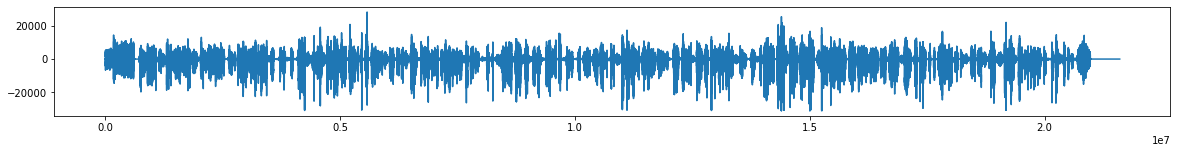

In [3]:
plt.figure(figsize = (20,2))
plt.plot(wavdata[:,0]);
plt.show()

In [4]:
# Create an instance of this extractor
ext = RMSExtractor(frame_length=2048)

# Extract features from the audio stimulus
rms_result = ext.transform(audio_file)
rms_result_df = rms_result.to_df()
rms_result_df.tail()

,order,duration,onset,object_id,rms
42183,42183,0.010667,449.952000,0,0.000018
42184,42184,0.010667,449.962667,0,0.000017
42185,42185,0.010667,449.973333,0,0.000018
42186,42186,0.010667,449.984000,0,0.000017
42187,42187,0.010667,449.994667,0,0.000017


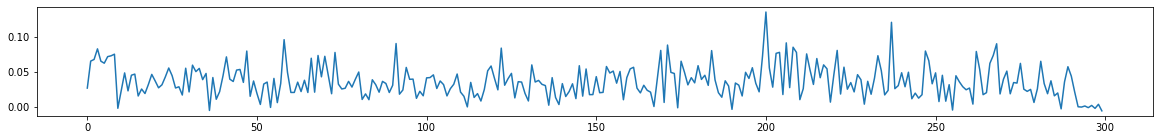

In [5]:
resampled_audio_feature = signal.resample(rms_result_df['rms'], 300)

plt.figure(figsize = (20,2))
plt.plot(resampled_audio_feature);


In [6]:
np.save('../data_pieman/resampled_audio_feature.npy', resampled_audio_feature)